In [1]:
import pandas as pd

pd.read_csv('fct_invoice.csv')

,invoice_no,customer_id,category,quantity,price,payment_method,invoice_date,shopping_mall
0,I138884,229,Clothing,5,1500.40,Credit Card,5/8/2022,Kanyon
1,I317333,3433,Shoes,3,1800.51,Debit Card,12/12/2021,Forum Istanbul
2,I127801,644,Clothing,1,300.08,Cash,9/11/2021,Metrocity
3,I173702,4900,Shoes,5,3000.85,Credit Card,16/05/2021,Metropol AVM
4,I337046,1089,Books,4,60.60,Cash,24/10/2021,Kanyon
...,...,...,...,...,...,...,...,...
99452,I219422,2344,Souvenir,5,58.65,Credit Card,21/09/2022,Kanyon
99453,I325143,172,Food & Beverage,2,10.46,Cash,22/09/2021,Forum Istanbul
99454,I824010,425,Food & Beverage,2,10.46,Debit Card,28/03/2021,Metrocity
99455,I702964,577,Technology,4,4200.00,Cash,16/03/2021,Istinye Park


In [2]:
pd.read_json('dim_customer.json')

,age,first_name,gender,id,last_name
0,48.0,Nicholas,M,0,Flores
1,NaN,Jeffery,M,1,Rowe
2,57.0,Alexis,F,2,Benton
3,73.0,Amy,F,3,Johnson
4,20.0,David,M,4,Moore
...,...,...,...,...,...
5186,NaN,Arthur,M,9428,Harris
5187,NaN,David,M,9494,Roy
5188,85.0,Thomas,M,10350,Turner
5189,NaN,April,F,10587,Sanchez


In [3]:
csv_df = pd.read_csv('fct_invoice.csv')
json_df = pd.read_json('dim_customer.json')

In [4]:
csv_df['Count'] = 1
csv_df['#'] = csv_df.index+1

In [5]:
cols = list(csv_df.columns)
csv_df = csv_df[[cols[-1]]+cols[0:9]]

csv_df

,#,invoice_no,customer_id,category,quantity,price,payment_method,invoice_date,shopping_mall,Count
0,1,I138884,229,Clothing,5,1500.40,Credit Card,5/8/2022,Kanyon,1
1,2,I317333,3433,Shoes,3,1800.51,Debit Card,12/12/2021,Forum Istanbul,1
2,3,I127801,644,Clothing,1,300.08,Cash,9/11/2021,Metrocity,1
3,4,I173702,4900,Shoes,5,3000.85,Credit Card,16/05/2021,Metropol AVM,1
4,5,I337046,1089,Books,4,60.60,Cash,24/10/2021,Kanyon,1
...,...,...,...,...,...,...,...,...,...,...
99452,99453,I219422,2344,Souvenir,5,58.65,Credit Card,21/09/2022,Kanyon,1
99453,99454,I325143,172,Food & Beverage,2,10.46,Cash,22/09/2021,Forum Istanbul,1
99454,99455,I824010,425,Food & Beverage,2,10.46,Debit Card,28/03/2021,Metrocity,1
99455,99456,I702964,577,Technology,4,4200.00,Cash,16/03/2021,Istinye Park,1


# Easy

In [7]:
# 1. How many unique customers are there in the dataset?
csv_df1 = csv_df['customer_id'].nunique()
csv_df1

5191

In [8]:
# 2. What are the different categories of products available?
# How many unique categories are there?
csv_df2a = csv_df['category'].unique()

print("Categories: " + str(csv_df2a))

print()

csv_df2b = csv_df['category'].nunique()
print("Number of Categories: " + str(csv_df2b))

Categories: ['Clothing' 'Shoes' 'Books' 'Cosmetics' 'Food & Beverage' 'Toys'
 'Technology' 'Souvenir']

Number of Categories: 8


In [24]:
# 3a. What are the different payment methods used by customers?
csv_df3a = csv_df['payment_method'].unique()
print("Different payment methods:")
print(csv_df3a)

print("")
# 3b. Which payment method is the most popular?
csv_df3b = csv_df['payment_method'].value_counts().idxmax()
mp = csv_df.loc[csv_df["payment_method"] == csv_df3b].count()["Count"]
print("Most popular payment method:")
print(csv_df3b+" - "+str(mp))


Different payment methods:
['Credit Card' 'Debit Card' 'Cash']

Most popular payment method:
Cash - 44447


# Medium

In [25]:
csv_df['sales'] = csv_df['quantity'] * csv_df['price']

In [26]:
#1. What are the three most popular categories, by total sales?
category_sales = csv_df.groupby(['category']).sum()['sales']
csv_df4a = category_sales.sort_values(ascending=False) 
csv_df4 = csv_df4a.head(3)

csv_df4

C:\Users\user\AppData\Local\Temp\ipykernel_12380\2016306377.py:2: FutureWarning: The default value of numeric_only in DataFrameGroupBy.sum is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  category_sales = csv_df.groupby(['category']).sum()['sales']


category
Clothing      1.139968e+08
Shoes         6.655345e+07
Technology    5.786235e+07
Name: sales, dtype: float64

In [27]:
# 2. What are the total sales attributed to customers over the age of 45?
json_df1 = json_df.copy()

json_df1.rename(columns = {'id':'customer_id'}, inplace = True)

new_df = pd.merge(csv_df, json_df1)

over_45 = new_df.loc[new_df['age'] > 45]

csv_df5 = over_45.groupby(['Count']).sum()['sales']

csv_df5

C:\Users\user\AppData\Local\Temp\ipykernel_12380\2397199127.py:10: FutureWarning: The default value of numeric_only in DataFrameGroupBy.sum is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  csv_df5 = over_45.groupby(['Count']).sum()['sales']


Count
1    82039768.15
Name: sales, dtype: float64

In [48]:
new_df

,#,invoice_no,customer_id,category,quantity,price,payment_method,invoice_date,shopping_mall,Count,sales,age,first_name,gender,last_name
0,1,I138884,229,Clothing,5,1500.40,Credit Card,5/8/2022,Kanyon,1,7502.00,NaN,William,M,Anderson
1,2199,I126377,229,Cosmetics,2,81.32,Credit Card,5/4/2021,Metrocity,1,162.64,NaN,William,M,Anderson
2,3816,I178419,229,Shoes,3,1800.51,Debit Card,1/6/2021,Istinye Park,1,5401.53,NaN,William,M,Anderson
3,5211,I847727,229,Clothing,3,900.24,Credit Card,21/08/2022,Zorlu Center,1,2700.72,NaN,William,M,Anderson
4,5621,I219251,229,Shoes,5,3000.85,Credit Card,23/06/2022,Istinye Park,1,15004.25,NaN,William,M,Anderson
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
99452,99187,I198027,4973,Shoes,1,600.17,Cash,8/11/2021,Kanyon,1,600.17,NaN,Melissa,F,Bell
99453,99286,I989120,6161,Books,5,75.75,Cash,8/1/2021,Viaport Outlet,1,378.75,36.0,Leslie,F,Bass
99454,99291,I791963,6779,Clothing,5,1500.40,Credit Card,6/3/2021,Metropol AVM,1,7502.00,NaN,Kelly,F,Roberts
99455,99313,I100582,8386,Clothing,2,600.16,Cash,2/11/2021,Istinye Park,1,1200.32,47.0,Shawn,M,Perez


In [49]:
from matplotlib import pyplot as plt

In [56]:
# 3. How is the data distributed across different invoice dates? 
# Are there any seasonal trends or patterns? (Use a graph for this.)
new_df1 = new_df.copy()

dates = csv_df["invoice_date"]
new_df1["invoice_date"] = pd.to_datetime(dates, format= '%d/%m/%Y')

plot = new_df1[["invoice_date", "price"]].groupby(["invoice_date"]).sum()
plot

#though you can place ["price"] after .sum(), you can also opt not to as it already specifies "new_df1[["invoice_date", "price"]]", 
#so it only shows or is consisting of two columns (invoice_date and price)

,price
invoice_date,
2021-01-01,70616.94
2021-01-02,92159.87
2021-01-03,97413.67
2021-01-04,74301.54
2021-01-05,84981.96
...,...
2023-03-04,121128.26
2023-03-05,105813.17
2023-03-06,83544.76


<Axes: xlabel='invoice_date'>

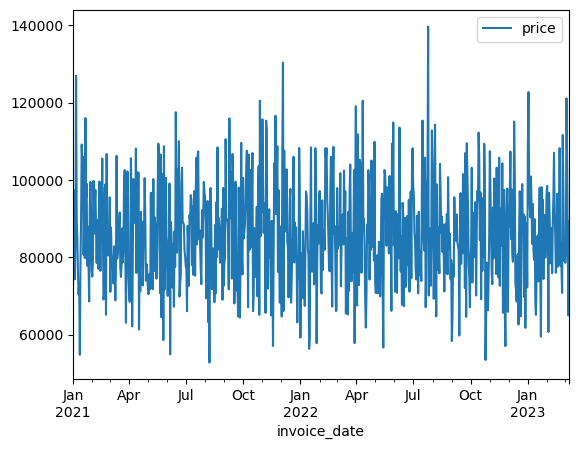

In [57]:
plot.plot()

# Hard

In [66]:
# 1. Create a pivot table showing the breakdown of sales across these dimensions, in this order: 
# category, decade age range (e.g., 10-19, 20-29, and so forth).

cutoff = [9, 19, 29, 39, 49, 59, 69, 79, 89, 99, 200]
age_range = ["10-19", "20-29", "30-39", "40-49", "50-59", "60-69", "70-79", "80-89", "90-99", "99+"]

new_df1["age_range"] = pd.cut(new_df1["age"], bins = cutoff, labels = age_range)

,#,invoice_no,customer_id,category,quantity,price,payment_method,invoice_date,shopping_mall,Count,sales,age,first_name,gender,last_name,age_range
0,1,I138884,229,Clothing,5,1500.40,Credit Card,2022-08-05,Kanyon,1,7502.00,NaN,William,M,Anderson,NaN
1,2199,I126377,229,Cosmetics,2,81.32,Credit Card,2021-12-12,Metrocity,1,162.64,NaN,William,M,Anderson,NaN
2,3816,I178419,229,Shoes,3,1800.51,Debit Card,2021-11-09,Istinye Park,1,5401.53,NaN,William,M,Anderson,NaN
3,5211,I847727,229,Clothing,3,900.24,Credit Card,2021-05-16,Zorlu Center,1,2700.72,NaN,William,M,Anderson,NaN
4,5621,I219251,229,Shoes,5,3000.85,Credit Card,2021-10-24,Istinye Park,1,15004.25,NaN,William,M,Anderson,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
99452,99187,I198027,4973,Shoes,1,600.17,Cash,2022-09-21,Kanyon,1,600.17,NaN,Melissa,F,Bell,NaN
99453,99286,I989120,6161,Books,5,75.75,Cash,2021-09-22,Viaport Outlet,1,378.75,36.0,Leslie,F,Bass,30-39
99454,99291,I791963,6779,Clothing,5,1500.40,Credit Card,2021-03-28,Metropol AVM,1,7502.00,NaN,Kelly,F,Roberts,NaN
99455,99313,I100582,8386,Clothing,2,600.16,Cash,2021-03-16,Istinye Park,1,1200.32,47.0,Shawn,M,Perez,40-49


In [72]:
pivot_table = pd.pivot_table(new_df1, values="sales", index=['category', 'age_range'], aggfunc='sum')
pivot_table

#new_df1.groupby(["category","age_range"]).sum()["sales"] : also produces similar output w/out use of pivot table
#aggfunc common: mean, sum, count

sales
category age_range           
Books    10-19       12801.75
         20-29       79461.75
         30-39       84143.10
         40-49       87203.40
         50-59       74962.20
...                       ...
Toys     60-69      363955.20
         70-79      273244.16
         80-89      153932.80
         90-99           0.00
         99+             0.00

[80 rows x 1 columns]